# Hidden singularities in the solid state

_Authors: Andrew Cassidy (1), Frank P. Pijpers (2), David Field (3)_

1. [Center for Interstellar Catalysis, Department of Physics and Astronomy, Aarhus University, DK](https://www.phys.au.dk/intercat)
2. [Korteweg-de Vries Institute for Mathematics, University of Amsterdam, NL](https://kdvi.uva.nl/)
3. [Department of Physics and Astronomy, Aarhus University, DK](https://www.phys.au.dk)


### Abstract <a class="anchor" id="abstract"></a>
_Films of dipolar molecules formed by physical vapour deposition are in general spontaneously polarized, with implications ranging from electron transfer in molecular optoelectronic devices to the properties of astrochemical ices in the interstellar medium. Polarization arises from dipole orientation which intuitively should decrease with increasing deposition temperature, T. However, experimentally it is found that minimum or maximum values in polarization vs T may be observed for films of cis-methyl formate, 1-propanol and ammonia. A continuous analytic form of polarization vs T is developed which has the property that it is not differentiable at all T. The minima and maxima in polarization vs T are marked by singularities in the differential of this analytic form. This exotic behaviour is presently unique to films of dipolar species and has not been reported, for example, in the related magnetic phases of spin glasses._


### Introduction<a class="anchor" id="introduction"></a>

The presence of both short range interactions and an effectively infinite range mean field is well-known to lead to complex behaviour in ordered or disordered solids. Examples include proton disorder in hexagonal water ice,[1](#ref_1),[2](#ref_2),[3](#ref_3) quantum superfluids,[4](#ref_4) and magnetic phases in spin glasses.[5](#ref_5) The cooperative effect of interactions on the sub-nm scale and a permeating mean field can result in emergent properties including non-ergodic phases of matter, spontaneous order and disorder, and unusual ageing behaviour. Understanding non-ergodic behaviour is a fundamental aim of statistical mechanics and many mathematical models of such physical and theoretical systems have been presented to understand the interplay between long range and short range forces. The most well-known case is that encountered in the much studied magnetic spin glasses.[5](#ref_5)

In the present work, we consider an electrostatic system, governed by a model whose Hamiltonian bears formal similarity to that of spin glasses. We develop a mathematical model for solid films composed of dipolar molecules. These films are non-ergodic systems exhibiting spontaneous polarization, so-called ‘spontelectrics’. They show the property that the model function describing polarization _vs_ temperature of deposition is continuous but yet cannot be differentiated at every temperature, with the differential of the function passing through a singularity at a specific temperature. This is mirrored experimentally. Spontelectrics may show the property that polarization _vs_ temperature passes through a minimum or maximum with temperature, a feature reproduced by the model. We find here that the temperature associated with the maximum or minimum polarization is that which gives rise to the singularity in the differential of the model function. Thus the observed counter-intuitive behaviour is associated with this singular behaviour. This description, where the total differential of a continuous function cannot be regarded as its slope, is well-known to pure mathematicians[6](#ref_6) but not generally appreciated in physics or indeed encountered elsewhere in the physical sciences as a whole.

The spontelectric effect emerges in thin films formed by condensation of dipolar molecules from the gas phase, on a sufficiently low temperature surface. The effect results from collective dipole orientation throughout the film of material, with the average dipole generating a non-zero angle with the plane of the film.[7](#ref_7),[8](#ref_8),[9](#ref_9),[10](#ref_10),[11](#ref_11) Components, in the $x-y$ plane of the film, average to zero. Our focus here is on the functional relationship between the degree of polarization of these films and their temperature of deposition, $T$. The degree of polarization may be represented, through the Langevin function, by $\rm coth ( \xi/T ) - (\xi / T)^{-1}$, using atomic units.[12](#ref_12) Here $\xi$ is the energy of interaction of an average dipole with the mean effective field in the film, where this field is itself a function of the degree of polarization. We show below that the differential of the continuous function, $\rm coth ( \xi/T ) - (\xi / T)^{-1}$, may not describe its slope, and minimum and maximum values are no longer marked by setting differentials to zero.

The mean field Hamiltonian for the system, $\xi$, is given by the energy of interaction of the dipole, $\mu$, in the mean effective field, $E_{Z}$, expressed as

[Eqn. 1]<a class="anchor" id="equation_1"></a>
\begin{align}
\mathrm{(1)} \quad \xi = \mu E_{Z} = \mu \left[ E_{S} \left[ 1+ \zeta\left(\frac{\langle\mu_{z}\rangle}{\mu}\right)^{2} \right]  - E_{A}\frac{\langle\mu_{z}\rangle}{\mu} \right]
\end{align}

$\langle\mu_z\rangle/\mu$ marks the degree of polarization, defined as the average component of the dipole moment in the $z$-direction, normal to the plane of the film, divided by the total dipole moment of the species in the solid, where $\mu$ is the dipole moment of a molecule in the solid state (see supplementary material, section [S1](#sup1)).The temperature dependence of $\langle\mu_z\rangle/\mu$ is given by the Langevin function.[12](#ref_12) $E_{S}, \zeta$ and $E_{A}$ are three parameters to be determined by fitting to experimental data, where: $\mu E_{S}$ defines the symmetric interactions which bind dipoles together, associated with polarization, dispersion and covalent interactions; $\mu E_{S}[\zeta (\langle\mu_z\rangle/\mu)^{2}]$ describes the dipole-dipole interactions, proportional to $(\langle\mu_z\rangle/\mu)^{2}$, and; the third term,  $E_{A}\langle\mu_z\rangle/\mu$ represents the spontelectric field itself and is proportional to $\langle\mu_z\rangle/\mu$, the degree of polarization. Thus $E_{A}$ defines the backward–forward asymmetric field created by the average dipole and experienced by the average dipole. The value of $E_{A}$ can be constrained by appeal to theory (see supplementary material, section [S1](#sup1)). The system finds a configuration corresponding to a balance between thermal agitation, and the short range and long (or infinite) range terms in the mean field Hamiltonian in [Eqn.1](#equation_1). The governing equation therefore has the form $f(T,\langle\mu_z\rangle/\mu) = \langle\mu_z\rangle/\mu$, an implicit equation containing feedback, through which the behaviour of orientation with deposition temperature, _T_, depends on the degree of orientation itself.

The mean-field Hamiltonian in [Eqn.1](#equation_1) is essentially very similar to that governing spin glasses, for example in [13](#ref_13), with the latter involving magnetic dipoles. Energetically, a similar competition between short range interactions and a longer range mean field is present in both spontelectrics and spin glasses. A key difference, however, is the spontaneous development of the electric field, the mean field, in a spontelectric material, as represented by the third term in [Eqn.1](#equation_1). 

Earlier work, involving films of *cis*-methyl formate (*cis*-MF) revealed the singular behaviour of the differential of the Hamiltonian in [Eqn.1](#equation_1)., but for some years remained the only such case observed experimentally.[8](#ref_8),[14](#ref_14) An additional set of experimental data has been acquired for _1_-pentanol,[10](#ref_10) which displays the phenomenon discussed here, and also results which point very clearly to the same phenomenon in thin films of ammonia (NH$_{3}$).[15](#ref_15) 


### Results<a class="anchor" id="results"></a>

The degree of orientation is dictated by competition between intermolecular interactions and interactions of the molecular dipole with the self-generated spontelectric field. Disorder is represented through temperature. However, experiment shows that the degree of dipole orientation does not monotonically decrease with increasing deposition temperature. This is shown in [Fig. 1](#figure_1) for the case of *cis*-methyl formate, which  shows a minimum value at 75$\,$K to 77.5$\,$K. _1_-pentanol also exhibits counter-intuitive properties, exhibiting a weak maximum in orientation in the 30-40$\,$K deposition temperature range, see [Fig. 2](#figure_2).[10](#ref_10)

The polarization electric field, $E_{spont}$, the ‘spontelectric field’, equal to the macroscopic polarization divided by $\epsilon_{0} = (4\pi)^{-1}$ arises from the voltage on the surface of the film. This voltage is generated by dipoles protruding into free space at the film/vacuum interface. The voltage may be either positive, as in *cis*-MF, [Fig. 1](#figure_1), or NH$_{3}$ ,shown in [Fig. 3](#figure_3); or negative, as in _1_-pentanol, [Fig. 2](#figure_2), corresponding to positive or negative values of $\langle\mu_z\rangle/\mu$. For example, with reference to *cis*-MF, the $\delta$-positive methyl group of methyl formate, (HC=O)–O–CH3, has a greater probability to extend from the surface into vacuum, compared with the $\delta$-minus (HC=O)-O moiety. There is no free charge in the system and therefore $E_{spont}$ is constant and is given by the surface voltage divided by the thickness of the film.[8](#ref_8)


### Figure 1: Temperature variation of $\langle\mu _{z}\rangle/ \mu$ for *cis*-methyl formate<a class="anchor" id="figure_1"></a>



In [9]:
#Imports

from IPython.display import HTML, Markdown
import math
import numpy, pandas 
import matplotlib.pyplot as plt
import openpyxl
import xlrd
import glob


print('numpy version is '+numpy.__version__)
print('pandas version is '+pandas.__version__)
print('openpyxl version is '+openpyxl.__version__)
print('xlrd version is '+xlrd.__version__)



numpy version is 1.16.5
pandas version is 0.25.1
openpyxl version is 3.0.0
xlrd version is 1.2.0


In [10]:
#Define the relevant functions

def Langevin(x):
#
# the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^3)
#
    if (abs(x)>1.0e-6) :
        y=math.cosh(x)/math.sinh(x)-1/x
    else :
        y=x/3.0
    return y

def DerLangevin(x):
#
# the derivative of the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^2)
#
    if (abs(x)>1.0e-6) :
        auxden=1.0/math.sinh(x)
        y=-1.0*auxden*auxden+1.0/x/x
    else :
        y=1.0/3.0
    return y

def DDerLangevin(x):
#
# the second derivative of the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^2)
#
    if (abs(x)>1.0e-6) :
        auxden=1.0/math.sinh(x)
        y=2.0*(math.cosh(x)*auxden*auxden*auxden-1.0/x/x/x)
    else :
        y=0.0
    return y

def LangevInv(y):
#
# the inverse of the Langevin function for a single real argument y
# this uses an expression derived by Petrosyan (2017)
# 02/06/2022 (FPP): the approximation is only correct for positive values of the argument, so
#   in order to also work for negative values I have modified the function.
#
    if (abs(y)<1.0) :
        yab=abs(y)
        x=y*(3.0+yab*math.sin(7.0*yab/2.0)/5.0+yab*yab/(1-yab))
        return x
    else :
        print("LangevInv: argument out of range, stopping.")
        return

def DerLangevInv(y):
#
# the derivative of the inverse of the Langevin function for a single real argument y
# this uses an expression for the inverse of the Langevin function derived by Petrosyan (2017)
# 02/06/2022 (FPP): the approximation is only correct for positive values of the argument, so
#   in order to also work for negative values I have modified the function.
#
    if (abs(y)<1.0) :
        yab=abs(y)
        x=3.0+2.0*yab*math.sin(7.0*yab/2.0)/5.0+7.0*yab*yab*math.cos(7.0*yab/2.0)/10.0
        x+=(3.0-2.0*yab)*yab*yab/(1-yab)/(1-yab)
        return x
    else :
        print("DerLangevInv: argument out of range, stopping.")
        return
    
def NeaterOut(x,s):
#
# prepares the strings for providing nicer-looking output of parameters with uncertainties
    spon=math.floor(math.log10(abs(s)))+1
    divis=math.exp(spon*math.log(10))
    xout=x/divis
    sout=s/divis
    string='({0:.2f}$\pm${1:.2f}) $10^{2:n}$'.format(xout,sout,spon)
    return string

def ConstrLSQ(x,y,wht):
#
# Solve a linear least squares problem for 1 dependent variable y as a function of
# nvar independent variables x.
# Linear least-squares problems for more than 1 parameter require a matrix inversion
# Here for arbitrary numbers of parameters the required matrix elements are 
# calculated and the matrix is inverted, after which the parameters are obtained.
# Input: a matrix x[nvar,ndat] containing ndat measurements of nvar independent
#           variables x
#        a vector y[ndat] containing the dependent variable
#        a vector of weights [ndat] which is used to give particular measurements 
#           less weight if desired. 
# NOTE: if a constant offset is required as one of the free parameters, an x-variable 
# which is all 1's must be present in (added to) the input matrix x.
#
    if (x.shape[1] != y.shape[0]) :
        print("ConstrLSQ: unequal array lengths, stopping.")
        par=numpy.array([])
        return
    if (x.shape[1] != wht.shape[0]) :
        print("ConstrLSQ: unequal array lengths, stopping.")
        par=numpy.array([])
        return

#
# declaration of local variables
    ndat=xdat.shape[1]
    nvar=xdat.shape[0]
    whtsum=0.0
    ysum=0.0
    xsum=numpy.array([0.0]*nvar)
    xysum=numpy.array([0.0]*nvar)
    xsqsum=numpy.array([[0.0]*2,[0.0]*2])
    Ainv=numpy.array([[0.0]*2,[0.0]*2])
    par=numpy.array([0.0]*nvar)
#
# weighted sum of measurements of dependent variable 
    for i in range(0,ndat):
        ysum+=y[i]*wht[i]
#
# weighted sum of measurements of independent variables and of cross-products on independent variables
# with each other and with dependent variable.
    for k in range(0,nvar):
        for i in range(0,ndat):
            whtsum+=wht[i]
            xsum[k]+=x[k,i]*wht[i]
            xysum[k]+=x[k,i]*y[i]*wht[i]
        for l in range(0,nvar):
            for i in range(0,ndat):
                xsqsum[k,l]+=x[k,i]*x[l,i]*wht[i]
#
# start solving the set of linear equations for the linear least squares problem
    if (nvar==1) :
#
# if only one parameter to be determined
        par[0]=ysum/xsum[0]
    else:
#
# for determination of 2 parameters
        if (nvar==2) :
            Det=xsqsum[0,0]*xsqsum[1,1]-xsqsum[1,0]*xsqsum[0,1]
            if (abs(Det)>1.0e-9) :
                Ainv[0,0]=xsqsum[1,1]/Det
                Ainv[0,1]=-1.0*xsqsum[0,1]/Det
                Ainv[1,0]=-1.0*xsqsum[1,0]/Det
                Ainv[1,1]=xsqsum[0,0]/Det
                par[0]=Ainv[0,0]*xysum[0]+Ainv[0,1]*xysum[1]
                par[1]=Ainv[1,0]*xysum[0]+Ainv[1,1]*xysum[1]
            else :
                print("ConstrLSQ: singular matrix. stopping")
                par=numpy.array([])
                return
        else :
#
# the general case of 3 or more parameters to be determined.
            Ainv=numpy.linalg.inv(xsqsum)
            par=numpy.dot(Ainv,xysum)
#
    return par

# Define several conversion factors to/from atomic units
# conversion of Temp to a.u. : T [a.u.]= T [K]/factor
Ttoau=315770.0
# conversion of D to a.u. : 1 D (=Debye) = factor [a.u.]
Debye=0.393456
# Convert el. field in a.u. To V/m : E [a.u.] = E [V/m]/factor
Etoau=5.142e11
#

In [11]:
#describe the plot settings

def FigureE(x,y,z,xmin,xmax,ymin,ymax,title, tick):
#
# make a plot of the measured and modelled field
#
    fig, ax = plt.subplots(figsize=(10, 5.4))
    plt.title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.scatter(x, z, marker='o', s=40, color='red', label='observed')
    ax.scatter(x, y, marker='+', s=40, color='blue', label='model')
    #ax.set_yticks(tick)
    ax.set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    ax.set_ylabel('Electric Field / Vm$^{-1}$', fontsize=16, fontname='garamond')
    ax.tick_params(labelsize='large')
    ax.legend(loc=0, fontsize=14, framealpha=0)
    
    #plt.savefig('E field variation for '+title+' as a function of Temperature')
    return

def FigureMu(x,y,z,sigx,sigy,xmin_mu,xmax_mu,ymin_mu,ymax_mu,title,tick):
#
# make a plot of the measured and modelled z-component of mu
#
    fig, ax = plt.subplots(figsize=(10, 5.4))
    plt.title(title)
    ax.set_xlim(xmin_mu, xmax_mu)
    ax.set_ylim(ymin_mu, ymax_mu)
    ax.errorbar(x, z, markersize=10, xerr=sigx, yerr=sigy, fmt='.', color='red', label='observed')
    ax.scatter(x, y, marker='^', s=50, color='blue', label='model')
    #ax.set_yticks([0.01,0.02,0.03,0.04])
    #ax.set_yticks(tick)
    ax.set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    ax.set_ylabel('Dipole orientation / $\mu_Z/\mu$', fontsize=16, fontname='garamond')
    ax.tick_params(labelsize='large')
    ax.legend(loc=0, fontsize=14, framealpha=0)
    
    #plt.savefig('dipole orientation for '+title+' as a function of Temperature')
    return

#

In [12]:
# Read the data for cisMF from file

SpontelData_cisMF = pandas.read_csv("Data/CisMF.csv")

# Provide the value of mu for this ice 
IceMu=0.354
# Provide a first guess value for the parameter E_A
EAnxt=1.118e9

SpontelData_cisMF.head()

,weight,y,sigma_y,Temperature,sigma_T,Observed_field
0,1.0,0.015232,0.00400,55.0,0.1,19569000.0
1,1.0,0.012198,0.00400,57.0,0.1,15672000.0
2,1.0,0.008909,0.00080,60.0,0.1,11446000.0
3,1.0,0.007217,0.00080,63.0,0.1,9271800.0
4,1.0,0.005620,0.00008,65.0,0.1,7220500.0


In [13]:
# for cis-methyl formate the parameter zeta is not constant but a function of 
# temperature. The T dependence is fixed (cubic with 3 pars)

# Define the function to adjust zeta as a function of temperature
def cisMFhtfc(T):
#
# functional form for zeta, with different forms for temperatures below and above 80 K. The form for 
#        zeta = 29449.2 -760.113756613971 T -0.245238095233991 T^2 + 0.157407407407381 T^3
# and above 80
#        zeta = 1.632e7 – 5.2925e5 T + 5719.9 T^2 – 20.59 T^3
# the two forms are rearranged to still match at a temperature (just below) 80 K with a single value
# of the fitting parameter zeta_0
# input for the function is the temperature in K
#
    htfc=numpy.array([0.0]*4)
    if (T<79.797) :
#
# c_1 = -760.113756613971/29449.2222222259 =-2.5811e-2
# c_2 = -0.245238095233991/29449.2222222259 = -8.3275e-6
# c_3 = 0.157407407407381/29449.2222222259 = 5.345e-6
#
        htfc[0]=1.0
        htfc[1]=-2.5811e-2
        htfc[2]=-8.3275e-6
        htfc[3]= 5.345e-6
    else :
        htfc[0]=5.5417e2
        htfc[1]=-1.7972e1
        htfc[2]=1.9423e-1
        htfc[3]=-6.9917e-4
#
    return htfc



$E_S =$(0.84$\pm$0.37) $10^7$<br>$E_A =$(1.23$\pm$0.27) $10^9$<br>$\zeta =$ Function of T<br>$\zeta_0 =$(0.48$\pm$0.21) $10^5$<br><br>reduced $\chi^2 =$90.4<br>

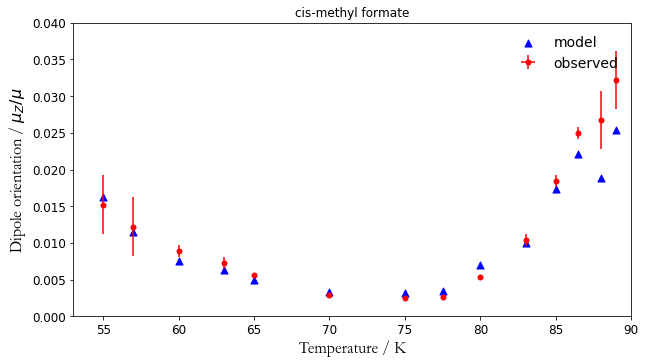

In [14]:
#main driver programme for fitting Spontelectric field data

weight=numpy.array(SpontelData_cisMF.weight)
ndata=len(weight)
# y is the same as <mu_Z>/mu, Temp is the deposition temperature in [K]
# sig are the 1-sigma measurement errors
# E observed is the observed Electric field in units [V/m]
y=numpy.array(SpontelData_cisMF.y)
sigy=numpy.array(SpontelData_cisMF.sigma_y)
Temp=numpy.array(SpontelData_cisMF.Temperature)
sigT=numpy.array(SpontelData_cisMF.sigma_T)
Eobs=numpy.array(SpontelData_cisMF.Observed_field)
#
# here comes a block of variable declarations
yinvmn=0.0
whtsum=0.0
hTfunc=numpy.array([0.0]*ndata)
DerhTfunc=numpy.array([0.0]*ndata)
DerGT=numpy.array([0.0]*ndata)
DerGy=numpy.array([0.0]*ndata)
PartDerv=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
xdat=numpy.array([[0.0]*ndata,[0.0]*ndata])
ydat=numpy.array([0.0]*ndata)
zdat=numpy.array([0.0]*ndata)
ymodel=numpy.array([0.0]*ndata)
DParDy=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
DParDT=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
SigPar=numpy.array([0.0]*3)
#
#
# Auxiliary functions f_0, f_1, f_2, and f_3 are needed as input for linear least-squares
# The are named here as PartDerv[0,], ..., PartDerv[3,] because these are also the
# partial derivatives of the function G with respect to T and y.
for i in range(0,ndata):
    yinvmn+=weight[i]/y[i]
    whtsum+=weight[i]
    htfc=cisMFhtfc(Temp[i])
    hTfunc[i]=htfc[0]+Temp[i]*(htfc[1]+Temp[i]*(htfc[2]+Temp[i]*htfc[3]))
    DerhTfunc[i]=htfc[1]+Temp[i]*(2.0*htfc[2]+3.0*Temp[i]*htfc[3])
    PartDerv[0,i]=(1-y[i])*LangevInv(y[i])
    PartDerv[1,i]=Ttoau*Debye*IceMu*(y[i]-1.0)/Temp[i]
    PartDerv[2,i]=-1.0*PartDerv[1,i]*y[i]
    PartDerv[3,i]=PartDerv[1,i]*y[i]*y[i]*hTfunc[i]
#
# start the iteration to get the parameters, initialise a choice for E_A
yinvmn=yinvmn/whtsum
EAcur=1.1*EAnxt
itcnt=0
while ((abs(EAnxt/EAcur-1.0)>1.0e-3) and (itcnt<20)) :
    itcnt+=1
    EAcur=EAnxt
    for i in range(0,ndata):
        xdat[0,i]=PartDerv[1,i]
        xdat[1,i]=PartDerv[3,i]
        ydat[i]=-1.0*(PartDerv[0,i]+EAcur*PartDerv[2,i]/Etoau)
#
    Constrout=ConstrLSQ(xdat,ydat,weight)
#
# FPP (02/06/2022): here E_S and zeta always are forced to be >= 0
    EScur=abs(Constrout[0]*Etoau)
    ESzetacur=abs(Constrout[1]*Etoau)
    ratiolog=0.0
    for i in range(0,ndata) :
        Ezmod=(EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
        ratiolog+=weight[i]*(math.log(abs(EAcur*Langevin(Ezmod)))-math.log(Eobs[i]))
        DerGy[i]=(EScur-ESzetacur*hTfunc[i]*y[i]*(2.0-3.0*y[i])+EAcur*(1.0-2.0*y[i]))*IceMu*Ttoau*Debye/Etoau/Temp[i]
        DerGy[i]+=-1.0*LangevInv(y[i])+(1.0-y[i])*DerLangevInv(y[i])
        DerGT[i]=(EScur*(1-y[i])-EAcur*y[i]*(1-y[i])+ESzetacur*hTfunc[i]*y[i]*y[i]*(1-y[i]))*IceMu*Ttoau*Ttoau*Debye/Etoau/Temp[i]/Temp[i]
        DerGT[i]+=-1.*ESzetacur*DerhTfunc[i]*y[i]*y[i]*(1-y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
    ratiolog=ratiolog/whtsum
    if ((Constrout[0]<0) and (EAcur<0) and (yinvmn<0) and (ratiolog>0)) :
        EAnxt=EAcur+2.0*yinvmn*EScur
    else :
        EAnxt=EAcur/math.exp(ratiolog)
    if (itcnt>19) : 
        print ("iteration count exceeded: not converged")
#
# G(T,y)\equiv\left(1-y\right)L^{-1}(y)-\frac{\mu}{T}\left\{ E_S\left[1-y+\zeta (y^2 -y^3)\right] 
#          -E_A(y-y^2) \right\}
# dG/dy=-L^{-1}(y)+\left(1-y\right)\frac{\d L^{-1}(y)}{dy}-\frac{\mu}{T}\left\{ 
#           E_S\left[-1+\zeta h(T) (2y -3y^2)\right] -E_A(1-2y) \right\}
# dG/dT=\frac{\mu}{T^2}\left\{ E_S\left[1-y+\zeta_0 h(T) (y^2 -y^3)\right] -E_A(y-y^2) \right\}-\frac{\mu}{T}
#           E_S\zeta_0\frac{d h(T)}{dT} (y^2 -y^3)
#
# for the calculation of the uncertainty margins for the parameters the partial derivatives below are needed
#
# also calculate the quality of the fit (chi-square) dlsqsum
dlsqsum=0
for i in range(0,ndata) :
    ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
    DelMod=y[i]-ymodel[i]
    dlsqsum+=weight[i]*DelMod*DelMod/sigy[i]/sigy[i]
    #print(i,weight[i]*DelMod*DelMod/sigy[i]/sigy[i])
    DParDy[0,i]=-1.0*DerGy[i]/PartDerv[1,i]
    DParDy[1,i]=-1.0*DerGy[i]/PartDerv[2,i]
    DParDy[2,i]=-1.0*DerGy[i]/PartDerv[3,i]
    DParDT[0,i]=-1.0*DerGT[i]/PartDerv[1,i]
    DParDT[1,i]=-1.0*DerGT[i]/PartDerv[2,i]
    DParDT[2,i]=-1.0*DerGT[i]/PartDerv[3,i]
#
dlsqsum=dlsqsum/(whtsum-2)
# calculate the 1-sigma uncertainties for the parameters
for k in range(0,3):
    for i in range(0,ndata) :
        SigPar[k]+=weight[i]*(DParDy[k,i]*DParDy[k,i]*sigy[i]*sigy[i]+DParDT[k,i]*DParDT[k,i]*sigT[i]*sigT[i]/Ttoau/Ttoau)
    SigPar[k]=Etoau*math.sqrt(SigPar[k]/whtsum)

zetacur=ESzetacur/EScur
SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)

EScisMF=NeaterOut(EScur,SigPar[0])
EAcisMF=NeaterOut(EAcur,SigPar[1])
zetacisMF=NeaterOut(zetacur,SigPar[2])

string="$E_S =$"+NeaterOut(EScur,SigPar[0])
string+="<br>"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
string+="<br>"+"$\zeta =$"+" Function of T" #NeaterOut(zetacur,SigPar[2])
string+="<br>"+"$\zeta_0 =$"+NeaterOut(zetacur,SigPar[2])
string+="<br><br>"+"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"<br>"
display(Markdown(string)) #use this line to see the answer


# make the figure 1
tick_MF=[0.01,0.02,0.03,0.04]
FigureMu(Temp,ymodel,y,sigT,sigy,53,90,0.0,0.04,'cis-methyl formate',tick_MF)
SpontelData_cisMF['alignment_model'] = ymodel.tolist()
ymodel=EAcur*ymodel
#FigureE(Temp,ymodel,Eobs,53,90,0.0,5.0e7,'cis-methyl formate', tick_MF)
SpontelData_cisMF['Efield_model'] = ymodel.tolist()

#Add the results to a list to recall later
lst_Ea = []
lst_Ea += [EAcur]
lst = []
lst +=[['cis-methyl formate',IceMu,EScisMF,EAcisMF,zetacisMF]]






**Figure 1**: _The variation of the degree of dipole orientation, $\langle\mu_z\rangle/\mu$, as a function of deposition temperature for cis-methyl formate. Experimental data are are shown as red points, derived from direct measurement of film surface potentials.[14](#ref_14) Fits to experiment, see supplementary material, section [S4](#S4), are shown in blue. Values of fitting parameters are given in [Table 1](#table_1). Note that values of $\langle\mu_{z}\rangle/ \mu$ are unstable for deposition temperatures $\ge$ 80$\,$K, decaying by ~50% on a timescale of an hour, after an initial period of stability of ~2000 seconds.[8](#ref_8),[16](#ref_16)_

### Figure 2: Temperature variation of $\langle\mu _{z}\rangle/ \mu$ for 1-Pentanol <a class="anchor" id="table_1"></a>



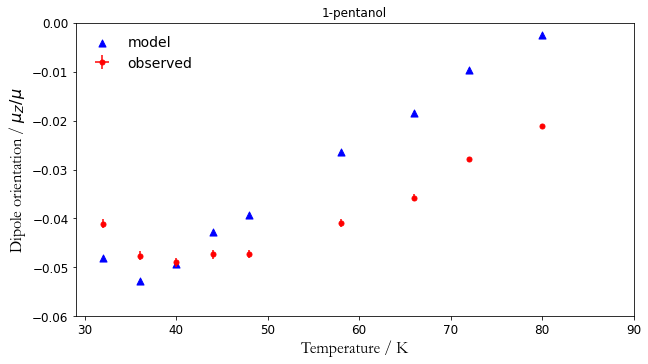

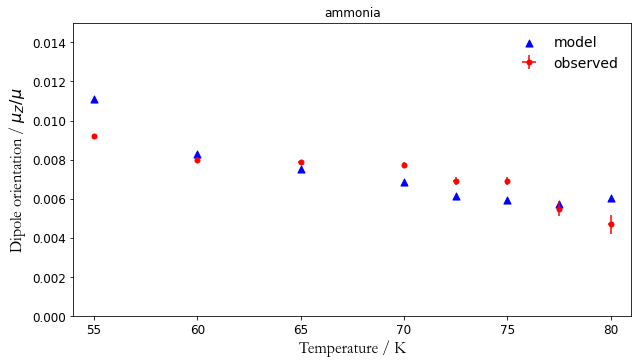

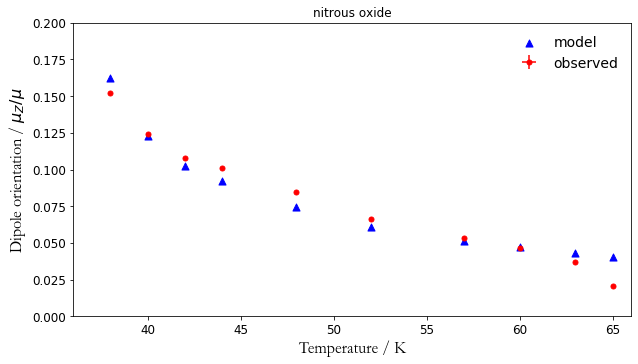

In [15]:
#run the main driver program for fitting the spontelectric model on multiple datasets
#load the datasets for each ice material

filenames=sorted(glob.glob("Data/DataFor_*.csv"))
SpontelData_dict = {}

for f in filenames:
    name=f[13:-4]
    
    SpontelData = pandas.read_csv(f)
    SpontelData_dict[name] =  (SpontelData)
    #
    # Main driver programme for fitting Spontelectric field data
    # 
    # Define several conversion factors to/from atomic units
    # conversion of Temp to a.u. : T [a.u.]= T [K]/factor
    Ttoau=315770.0
    # conversion of D to a.u. : 1 D (=Debye) = factor [a.u.]
    Debye=0.393456
    # Convert el. field in a.u. To V/m : E [a.u.] = E [V/m]/factor
    Etoau=5.142e11
 
    htfc=numpy.array([0.0]*4)
 
    # Find the value of mu for this ice 
    IceMu=(SpontelData.IceMu.iloc[0])
    
    # Provide a first guess value for the parameter E_A
    EAnxt=(SpontelData.EAnxt.iloc[0])
    
    htfc[0]=1.0
    htfc[1]=0.0
    htfc[2]=0.0
    htfc[3]=0.0
    
    weight=numpy.array(SpontelData.weight)
    ndata=len(weight)
    # y is the same as <mu_Z>/mu, Temp is the deposition temperature in [K]
    # sig are the 1-sigma measurement errors
    # E observed is the observed Electric field in units [V/m]
    y=numpy.array(SpontelData.y)
    sigy=numpy.array(SpontelData.sigma_y)
    Temp=numpy.array(SpontelData.Temperature)
    sigT=numpy.array(SpontelData.sigma_T)
    Eobs=numpy.array(SpontelData.Observed_field)
    #
    # here comes a block of variable declarations
    whtsum=0.0
    yinvmn=0.0
    hTfunc=numpy.array([0.0]*ndata)
    DerhTfunc=numpy.array([0.0]*ndata)
    DerGT=numpy.array([0.0]*ndata)
    DerGy=numpy.array([0.0]*ndata)
    PartDerv=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    xdat=numpy.array([[0.0]*ndata,[0.0]*ndata])
    ydat=numpy.array([0.0]*ndata)
    zdat=numpy.array([0.0]*ndata)
    ymodel=numpy.array([0.0]*ndata)
    DParDy=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    DParDT=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    SigPar=numpy.array([0.0]*3)
#
#
# Auxiliary functions f_0, f_1, f_2, and f_3 are needed as input for linear least-squares
# These are named here as PartDerv[0,], ..., PartDerv[3,] because these are also the
# partial derivatives of the function G with respect to T and y.
    for i in range(0,ndata):
        yinvmn+=weight[i]/y[i]
        whtsum+=weight[i]
        hTfunc[i]=htfc[0]+Temp[i]*(htfc[1]+Temp[i]*(htfc[2]+Temp[i]*htfc[3]))
        DerhTfunc[i]=htfc[1]+Temp[i]*(2.0*htfc[2]+3.0*Temp[i]*htfc[3])
        PartDerv[0,i]=(1-y[i])*LangevInv(y[i])
        PartDerv[1,i]=Ttoau*Debye*IceMu*(y[i]-1.0)/Temp[i]
        PartDerv[2,i]=-1.0*PartDerv[1,i]*y[i]
        PartDerv[3,i]=PartDerv[1,i]*y[i]*y[i]*hTfunc[i]
#
# start the iteration to get the parameters, initialise a choice for E_A
    yinvmn=yinvmn/whtsum
    EAcur=1.1*EAnxt
    itcnt=0
    while ((abs(EAnxt/EAcur-1.0)>1.0e-3) and (itcnt<20)) :
        itcnt+=1
        EAcur=EAnxt
        for i in range(0,ndata):
            xdat[0,i]=PartDerv[1,i]
            xdat[1,i]=PartDerv[3,i]
            ydat[i]=-1.0*(PartDerv[0,i]+EAcur*PartDerv[2,i]/Etoau)
#
        Constrout=ConstrLSQ(xdat,ydat,weight)
#
# FPP (02/06/2022): here E_S and zeta always are forced to be >= 0
        EScur=abs(Constrout[0]*Etoau)
        ESzetacur=abs(Constrout[1]*Etoau)
        ratiolog=0.0
        for i in range(0,ndata) :
            Ezmod=(EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
            ratiolog+=weight[i]*(math.log(abs(EAcur*Langevin(Ezmod)))-math.log(Eobs[i]))
            DerGy[i]=(EScur-ESzetacur*hTfunc[i]*y[i]*(2.0-3.0*y[i])+EAcur*(1.0-2.0*y[i]))*IceMu*Ttoau*Debye/Etoau/Temp[i]
            DerGy[i]+=-1.0*LangevInv(y[i])+(1.0-y[i])*DerLangevInv(y[i])
            DerGT[i]=(EScur*(1-y[i])-EAcur*y[i]*(1-y[i])+ESzetacur*hTfunc[i]*y[i]*y[i]*(1-y[i]))*IceMu*Ttoau*Ttoau*Debye/Etoau/Temp[i]/Temp[i]
            DerGT[i]+=-1.*ESzetacur*DerhTfunc[i]*y[i]*y[i]*(1-y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
        ratiolog=ratiolog/whtsum
        if ((Constrout[0]<0) and (EAcur<0) and (yinvmn<0) and (ratiolog>0)) :
            EAnxt=EAcur+2.0*yinvmn*EScur
        else :
            EAnxt=EAcur/math.exp(ratiolog)
        if (itcnt>19) : 
            print ("iteration count exceeded: not converged")
#
# G(T,y)\equiv\left(1-y\right)L^{-1}(y)-\frac{\mu}{T}\left\{ E_S\left[1-y+\zeta (y^2 -y^3)\right] 
#          -E_A(y-y^2) \right\}
# dG/dy=-L^{-1}(y)+\left(1-y\right)\frac{\d L^{-1}(y)}{dy}-\frac{\mu}{T}\left\{ 
#           E_S\left[-1+\zeta h(T) (2y -3y^2)\right] -E_A(1-2y) \right\}
# dG/dT=\frac{\mu}{T^2}\left\{ E_S\left[1-y+\zeta_0 h(T) (y^2 -y^3)\right] -E_A(y-y^2) \right\}-\frac{\mu}{T}
#           E_S\zeta_0\frac{d h(T)}{dT} (y^2 -y^3)
#
# for the calculation of the uncertainty margins for the parameters the partial derivatives below are needed
#
# also calculate the quality of the fit (chi-square) dlsqsum
    dlsqsum=0
    for i in range(0,ndata) :
        ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
        DelMod=y[i]-ymodel[i]
        dlsqsum+=weight[i]*DelMod*DelMod/sigy[i]/sigy[i]
        #print(i,weight[i]*DelMod*DelMod/sigy[i]/sigy[i])
        DParDy[0,i]=-1.0*DerGy[i]/PartDerv[1,i]
        DParDy[1,i]=-1.0*DerGy[i]/PartDerv[2,i]
        DParDy[2,i]=-1.0*DerGy[i]/PartDerv[3,i]
        DParDT[0,i]=-1.0*DerGT[i]/PartDerv[1,i]
        DParDT[1,i]=-1.0*DerGT[i]/PartDerv[2,i]
        DParDT[2,i]=-1.0*DerGT[i]/PartDerv[3,i]
#
    dlsqsum=dlsqsum/(whtsum-2)
# calculate the 1-sigma uncertainties for the parameters
    for k in range(0,3):
        for i in range(0,ndata) :
            SigPar[k]+=weight[i]*(DParDy[k,i]*DParDy[k,i]*sigy[i]*sigy[i]+DParDT[k,i]*DParDT[k,i]*sigT[i]*sigT[i]/Ttoau/Ttoau)
        SigPar[k]=Etoau*math.sqrt(SigPar[k]/whtsum)

#set up figures to show fit results
    ymin_mu=(SpontelData.ymin.iloc[0])
    ymax_mu=(SpontelData.ymax.iloc[0])
    xmin_mu=(SpontelData.xmin.iloc[0])
    xmax_mu=(SpontelData.xmax.iloc[0])
    ymin=(SpontelData.ymin.iloc[1])
    ymax=(SpontelData.ymax.iloc[1])
    xmin=(SpontelData.xmin.iloc[1])
    xmax=(SpontelData.xmax.iloc[1])
    ticks=[SpontelData.ticks.iloc[0:3]]
    
      
    FigureMu(Temp,ymodel,y,sigT,sigy,xmin_mu,xmax_mu,ymin_mu,ymax_mu,name,tick_MF)
    SpontelData_dict[name]['alignment_model'] = ymodel.tolist()
    ymodel=EAcur*ymodel
    lst_Ea += [EAcur]
    #FigureE(Temp,ymodel,Eobs,xmin,xmax,ymin,ymax,name, tick_MF)
    SpontelData_dict[name]['Efield'] = ymodel.tolist()
    
    #display(SpontelData.head()) 
    
    zetacur=ESzetacur/EScur
        
    SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)
    string = name
    string+="<br>"+"$E_S =$"+NeaterOut(EScur,SigPar[0])
    string+="<br>"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
    string+="<br>"+"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
    string+="<br><br>"+"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"<br>"
    #display(Markdown(string)) #Use this line to see the individual results for fitting parameters per dataset
    
    ES=NeaterOut(EScur,SigPar[0])
    EA=NeaterOut(EAcur,SigPar[1])
    zeta=NeaterOut(zetacur,SigPar[2])
    
    lst +=[[name,IceMu,ES,EA,zeta]]



    


**Fig. 2**: _The variation of the degree of dipole orientation, $\langle\mu _{z}\rangle/ \mu$, as a function of deposition temperature for 1-pentanol. Experimental data are shown as red points, derived from measurement of film surface potentials using a Kelvin probe.[4](#ref_4) Fits to experiment, see [S4](#S4), are shown in blue. Values of fitting parameters are given in [Table 1](#table_1)._

### Figure 3: Temperature variation of $\langle\mu _{z}\rangle/ \mu$ for NH<sub>3<sub><a class="anchor" id="figure_3"></a>

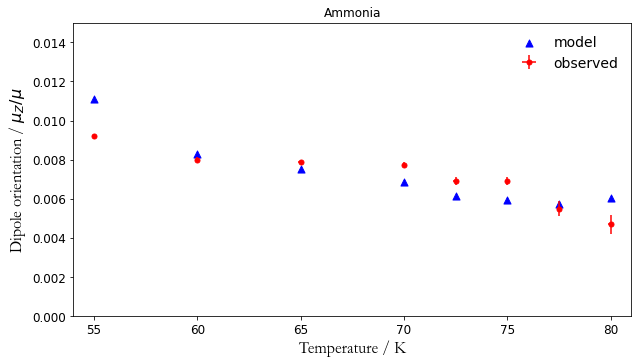

In [16]:
ammonia_figure = SpontelData_dict['ammonia'][['Temperature']+['y']+['alignment_model']+['sigma_T']+['sigma_y']+['Observed_field']]
EAamm=(lst_Ea[1])

Temp=ammonia_figure.Temperature
y=ammonia_figure.y
field=ammonia_figure.Observed_field
model=ammonia_figure.alignment_model
sigT=ammonia_figure.sigma_T
sigY=ammonia_figure.sigma_y

tick_Amm=[0.000, 0.004, 0.008, 0.012]
FigureMu(Temp,model,y,sigT,sigY, 54, 81, 0.0, 0.015,'Ammonia', tick_Amm)
#ymodel=EAamm*model
#FigureE(Temp,ymodel,field,54,81,2.0e7,7.0e7,'Ammonia')

**Figure 3**: _Data for the degree of orientation, $\langle\mu _{z}\rangle/ \mu$, in solid ammonia films, taken from experimental data in [12](#ref_12) (red points). Blue triangles show the fit obtained using the technique in described in [S(4)](#S4), yielding E<sub>S</sub> = 2.58 x 10<sup>7</sup>$\,$Vm<sup>-1</sup> , E<sub>A</sub> = 5.49 x 10<sup>9</sup>$\,$Vm<sup>-1</sup> , $\zeta$ = 1.76 x 10<sup>4</sup>, using set (ii) in [Table 1](table_1), weighting the value at 55$\,$K of orientation to 0.5 and all others to unity._

The spontelectric model, outlined in [Eqn.1](#equation_1), has proven successful in analysing data for the variation of spontelectric fields with deposition temperature,[17](#ref_17) Stark shifts in reflection-absorption infrared spectroscopy (RAIRS),[18](#ref_18)  vacuum ultraviolet spectroscopy of films of NH$_{3}$[15](#ref_15) and secondary relaxation in glassy *cis*-MF.[19](#ref_19) RAIRS experiments have confirmed, through the vibrational Stark effecr, the increase in dipole orientation in *cis*-MF for deposition temperatures $\ge\,$ 80$\,$K shown in [Fig. 1](#figure_1).[20](#ref_20) Here, we explicitly demonstrate that the singularity in the differential of [Eqn.1](#equation_1), mirrors the counter intuitive behaviour of some spontelectric materials, namely those that demonstrate a maximum or minimum valve of polarisation at some temperature.

### Analysis<a class="anchor" id="analysis"></a>

An explicit expression for $f(T,\langle\mu_{z}\rangle/\mu)$ is obtained directly by substitution of $E_z$, from [Eqn.1](#equation_1), into the Langevin function: see [S2.1](#sup2_eq1). We seek the differential of $f(T,\langle\mu_{z}\rangle/\mu)$ with respect to $T$, and this yields

[Eqn. 2]<a class="anchor" id="equation_2"></a>
\begin{align}
\mathrm{(2)} \quad \frac{d(\langle\mu_{z}\rangle / \mu)}{dT} = \left[ - \frac{\mu E_{z}}{T^{2}} {\rm cosech}^{2}\left(\frac{\mu E_{z}}{T}\right) + (\mu E_{z})^{-1} \right] / \Phi
\end{align}

and 

[Eqn. 3]<a class="anchor" id="equation_3"></a>
\begin{align}
\mathrm{(3)} \quad \Phi = \frac{T \left[ 2 \zeta (\langle\mu_{z}\rangle/ \mu) E_{S} - E_{A} \right]}{\mu E_{z}^{2}} - \frac{\mu}{T} \left[ 2 \zeta (\langle\mu_{z}\rangle/\mu) E_{S} - E_{A} \right] {\rm cosech}^{2}\left(\frac{\mu E_{Z}}{T}\right) -1 
\end{align}

We show in supplementary materials, section [S3](#S3) that the numerator in [Eqn. 2](#equation_2) cannot equal zero, for any combination of non-zero $T$ and $\langle\mu_{z}\rangle/ \mu$ or real values of parameters $E_S$, $E_A$ or $\zeta$. Thus, we are faced with the property that [Fig. 1](#figure_1) shows that $\langle\mu _{z}\rangle/ \mu$ vs $T$ displays a minimum value, or equally maximum absolute value in data for _1_-pentanol, but that $\frac{d(\langle\mu_{z}\rangle / \mu)}{dT}$ cannot equal zero. The form of [Eqn. 2](#equation_2) is such that the differential tends to infinity as $\Phi$ tends to zero. Referring for example to *cis*-MF, to the low temperature side of the condition that $\Phi$ tends to zero, $\frac{d(\langle\mu_{z}\rangle / \mu)}{dT}$ is negative and to the high temperature side, $\frac{d(\langle\mu_{z}\rangle / \mu)}{dT}$ is positive. This generates a minimum value in $\langle\mu _{z}\rangle/ \mu$ vs $T$. The signs of $\frac{d(\langle\mu _{z}\rangle / \mu)}{dT}$ are reversed for _1_-pentanol which shows a maximum (negative) value of $\langle\mu _{z}\rangle/ \mu$.

We obtain the values of parameters $E_{S}$, $E_{A}$ and $\zeta$, by fitting to experimental data _vs_ deposition temperature for *cis*-MF,[14](#ref_14) _1_-pentanol, [10](#ref_10), ammonia [15](#ref_15) and, for comparison, nitrous oxide.[17](#ref_17) Details on the least squares fitting procedure are provided in supplementary materials, section [S4](#S4) and we have produced an executable version of the paper to allow the reader experiment with the fit, explained in supplementary materials, section [S5](#S5). For _1_-pentanol, ammonia and nitrous oxide, all three parameters are treated as temperature independent, where we include, for ammonia only the higher temperature phase formed at $T$ > 50$\,$K, the phase of interest here.[10](#ref_10) For cis-MF, $\zeta$ is allowed to vary with temperature, as discussed in supplementary materials, section [S6](#S6).

We now seek to identify the temperature of deposition and associated degree of orientation which lead to singularities in $\frac{d(\langle\mu_{z}\rangle / \mu)}{dT}$, subject to $\Phi$ = 0 and $f(T,\langle\mu_{z}\rangle/\mu) = \langle\mu_{z}\rangle/ \mu$. Turning first to *cis*-MF, using a single set of values of parameters, $E_S$, $E_A$ and $\zeta$, we reproduce the general experimental form of $\langle\mu_{z}\rangle/ \mu$ vs $T$ [Fig. 1](#figure_1) for the full range of deposition temperature between 55$\,$K and 89$\,$K. This is shown in [Fig. S1](#figure_S1) in supplementary material. Futhermore, if we restrict our determination of temperature independent values of $E_S$, $E_A$ and $\zeta$ to those based upon values of orientation measured below 75$\,$K, that is, below the minimum value of $\langle\mu_z\rangle/ \mu$, then the rapid rise in orientation at $T \ge$ 80$\,$K follows directly.[8](#ref_8) 

We can create a more quantitative fit to data for *cis*-MF than that shown in [Fig. S1](#figure_S1), by allowing $\zeta$ vary with deposition temperature. This quantitiative fit is shown in [Fig. 1](#figure_1). Experimental data demonstrate the decay of dipole orientation with time in *cis*-MF.[16](#ref_16) These data show that the extent to which molecules are restricted in their angular motion, represented by the term involving $\zeta(\langle\mu_z\rangle/ \mu)^{2}$ in [Eqn. 1](#equation_1), is deposition temperature dependent and that this dependence may be wholly represented by the temperature dependence of $\zeta$,[19](#ref_19). see supplementary material, section [S6](#S6). 

We turn now _1_-pentanol,[10](#ref_10) between 32$\,$K and 48$\,$K, the range for which maximum negative values of orientation were observed. Results, based on Kelvin probe measurements, may be expressed as electric fields. For example the value of the spontelectric field, $E_{spont}$, is estimated to be 1.75 x 10<sup>8</sup> Vm<sup>-1</sup> for _1_-pentanol at 40$\,$K.[2](#ref_2)  We use $E_{A} = 4\pi \mu / \Omega$, in atomic units, as derived in [8](#ref_8), rather than fitting, where $\mu$ is the solid state dipole and $\Omega$ is the molecular volume, itself related to the polarizability, $\alpha$,[23](#ref_23) see supplementary material, section [S1](#S1). We find that $E_{A}$ = -5.61 x 10<sup>9</sup> Vm<sup>-1</sup> for _1_-pentanol. Since $E_{spont} = E_{A}\frac{\langle\mu_z\rangle}{\mu}$, this allows the evaluation of $\langle\mu_z\rangle/ \mu$ for _1_-pentanol, shown in [Fig. 2](#figure_2). 

The hypothesis is that the maximum negative value should occur at a point $(T,\langle\mu _{z}\rangle/ \mu$) such that $f(T,\langle\mu _{z}\rangle/ \mu) = \langle\mu _{z}\rangle/ \mu$ and  $\Phi = 0$ are simultaneously satisfied. Holding $E_{S}$ and $\zeta$ constant with temperature, we find that the presence of a maximum negative value, satifying these constraints, is a direct consequence of our theoretical model. The least-squares best fit variation of $\langle\mu _{z}\rangle/ \mu$ _vs_ $T$ to observed values is shown in [Fig. 2](#figure_2). We estimate T = 36$\,$K for _1_-pentanol for the maximum negative value, with an accompanying value $\langle\mu _{z}\rangle/ \mu$ = -0.047. Observed values are 40$\,$K, with $\langle\mu _{z}\rangle/ \mu$ = -0.046 respectively. 

Results for films of NH<sub>3</sub> are shown in [Fig. 3](#figure_3). Data have been measured only up to 80$\,$K.[10](#ref_10) We are unable to perform experiments at higher deposition temperatures, since NH<sub>3</sub> does not ‘stick’ at $T$ > 80$\,$K under our experimental conditions of base pressure of <10<sup>-9</sup>$\,$mbar. Data for NH<sub>3</sub> are shown in [Fig. 3](#figure_3) in red and a fit to these values in blue, using parameters in [Table 1](#table_1). The results for NH<sub>3</sub> are similar in character to those for *cis*-MF, in the range of temperature of deposition approaching that associated with the minimum value of $\langle\mu _{z}\rangle/ \mu$ for *cis*-MF, from the low $T$ side. However, for NH<sub>3</sub>, access to values of high enough $T$, for which a minimum value of $\langle\mu _{z}\rangle/ \mu$ might in principle be found, is not feasible. Thus experimentally $T$ can never be such that $\Phi = 0$ and $f(T,\langle\mu _{z}\rangle/ \mu) = \langle\mu _{z}\rangle/ \mu$ are simultaneously satisfied. We suggest, from the appearance of the data in [Fig.3](#figure_3), that 80$\,$K is nevertheless close to the temperature for which the switch from negative to positive slope occurs in $\frac{d(\langle\mu _{z}\rangle/ \mu)}{dT}$. The presence of a putative minimum value of $\langle\mu _{z}\rangle/ \mu$, at sufficiently high $T$, may be inferred from the property of NH<sub>3</sub>, shared with *cis*-MF and _1_-propanol, that $E_{S}$ << $E_{A}$ and $\zeta$ is large. A comparison of parameters for N<sub>2</sub>O is shown in [Table 1](#table_1), for which $E_{S}$, $E_{A}$ are comparable in magnitude and no such minimum value in $\langle\mu _{z}\rangle/ \mu$ vs $T$ can be identified.[8](#ref_8),[21](#ref_21)

### Table 1: Spontelectric parameters for different species <a class="anchor" id="table_1"></a>

In [17]:
#Create the table with all entries

col_head = ['Molecule','Diplole Moment / D','Es / V/m','Ea / V/m','zeta']
table_1=pandas.DataFrame(lst, columns = col_head)

#remove the index for the table
display(HTML(table_1.to_html(index=False)))

col_head2 = ['Molecule','Diplole_Moment','Es','Ea','zeta']
table_1=pandas.DataFrame(lst, columns = col_head2)

Molecule,Diplole Moment / D,Es / V/m,Ea / V/m,zeta
cis-methyl formate,0.3540,(0.84$\pm$0.37) $10^7$,(1.23$\pm$0.27) $10^9$,(0.48$\pm$0.21) $10^5$
1-pentanol,0.4256,(46.52$\pm$0.42) $10^6$,(-275.28$\pm$0.96) $10^7$,(27.56$\pm$0.54) $10^1$
ammonia,0.5770,(26.55$\pm$0.66) $10^6$,(5.51$\pm$0.13) $10^9$,(1.66$\pm$0.11) $10^4$
nitrous oxide,0.0669,(48.54$\pm$0.35) $10^7$,(7.45$\pm$0.57) $10^8$,(7.06$\pm$0.31) $10^1$


**Table 1**: _Column 2: dipole moments, $\mu$, of molecules in the solid. Columns 3, 4 and 5: values of parameters, in the Hamiltonian in [Eqn. 1](#equation_1), defining the mean field in solid films of cis-methyl formate[20], and 1-pentanol,[10] and ammonia (NH<sub>3</sub>),[15] the latter for the higher temperature phase formed at T $\gt$ 50$\,$K.  Parameters for nitrous oxide for T $\ge$ 48$\,$K are included for comparison.[21](#ref_21)   Errors in values of parameters leading to corresponding errors in values of the degree of dipole orientation, $\langle\mu _{z}\rangle/ \mu$, of $\pm$ 10% to 15% for cis-MF (see [Fig. 1](#figure_1)) and $\pm$ 5% for NH<sub>3</sub>. There are systematic errors associated with 1-pentanol, which cannot be readily assessed, since these depend on the quantities, such as molecular spacing, which are not accurately known; see supplementary materials, section [S1](#S1). Errors shown for 1-pentanol are random errors associated with fitting._

### Discussion<a class="anchor" id="discussion"></a>

Feedback via dipole-dipole interactions in the Hamiltonian, specifically through the term $\mu E_{S} \zeta (\langle\mu _{z}\rangle/ \mu)^{2}$, is an essential element in creating the non-monotonic behaviour of $\langle\mu _{z}\rangle/ \mu$ with increasing deposition temperature. Thus, the removal of feedback, writing $\zeta$ = 0, entirely eliminates the non-monotonic behaviour. The relative importance of terms in the Hamiltonian in [Eq. 1](#equation_1) gives some insight into the analytic difference between *cis*-MF or _1_-pentanol and spontelectric material such as nitrous oxide, which shows a monotonic decrease of $\langle\mu _{z}\rangle/ \mu$ with deposition temperature. The ratio, $r$, of the second and first terms, that is, $\mu(E_{A}\langle\mu _{z}\rangle/ \mu)$ and $\mu{E_{S}[1 + \zeta(\langle\mu _{z}\rangle/ \mu)^{2}]}$, in the Hamiltonian, [Eq.1](#equation_1), is significantly greater in systems which display a minimum or maximum value in orientation vs deposition temperature. Thus, using values in [Table 1](#table_1), the value of $r$ for *cis*-MF lies between 0.2 and 0.3 in the range $T$ = 55$\,$K to 89$\,$ and between 1.5 and 2.1 for _1_-pentanol in the range $T$ = 32$\,$K to 48$\,$K. By comparison, for nitrous oxide, $r$ ~ 0.06, in the range $T$ = 52$\,$K to 60$\,$K. Thus, a stronger relative influence, of the term associated with spontelectric field, introduces singularities into the differential of the governing function $f(T,\mu_{z}/\mu)$, with $\Phi$, [Eqn. 3](#equation_3), passing through zero.  For ammonia, in the range $T$ = 55$\,$K to 80$\,$K, $r$ ~ 0.7 to 0.8, lying between values for *cis*-MF and _1_-pentanol.  

It is also apparent that spontelectric materials are non-ergodic systems. Ostensibly the same film may be prepared through two different routes and yet have different properties. Thus the measured properties of the film are not independent of the route by which it was formed, violating a fundamental tenet of a thermodynamic system. By way of example, a film of nitrous oxide formed by deposition at 40$\,$K yields material with a spontelectric field of 1.9 x 10<sup>8</sup> Vm<sup>-1</sup> field. If you prepare ostensibly the same film by deposition at higher temperature, say, 60$\,$K, and cooling to 40$\,$K, the spontelectric field is ~2.66 times lower. Thus, annealing and cooling do not achieve the same degree of polarization as achieved through direct growth. In this connection, the complex ageing behaviour of spontaneously polarized *cis*-methyl formate and alcohols shows that molecular dipoles are able to fluctuate and explore the potential energy landscape, but only incompletely.[10](#ref_10),[16](#ref_16),[19](#ref_19),[24](#ref_24) The film may be trapped in a local minimum even in the absence of any glassy character. Thus some degree of frustration may be preserved, similar to that encountered by magnetic moments in a spin glass.[25](#ref_25) The equivalent non-thermodynamic aspect of spin glasses, as evidenced by the distinction between zero-field-cooling and the thermoremanent-magnetization, has most recently been studied in crystalline CuMn.[26](#ref_26) Our model of spontelectrics however implicitly assumes that films are governed by thermodynamics, since the Langevin expression is based on the Boltzmann statistics. For the present we assert that films formed by direct deposition at a specific temperature can be treated as thermodynamic systems, since the model provides a useful description of spontelectric properties in a wide variety of contexts.

The observation of spontaneous polarization in materials discussed here, methyl formate, _1_-proponal, ammonia and nitrous oxide, is of no technical application. We note however, that ices of ammonia have been observed on several bodies in our own solar system.[27](#ref_27),[28](#ref_28) Some of the implications for polarized ices in the interstellar medium have been considered elsewhere.[29](#ref_29) Spontaneous polarization has also been reported in thin glassy films of materials commonly used to produce optoelectrically active materials.[30](#ref_30) To our knowledge, the pathological behaviour reported here in the temperature dependence of dipole orientation, has not been reported for films used to produce optoelectronic devices. And we note that models that account for dipole orientation in optoelectronic devices, fail to take into account any role for the mean field.[31](#ref_31),[32](#ref_32) Nonetheless, the behaviour described by these reports is similar to that reported for spontelectric materials.

An important advance was made recently in understanding the mechanism for the spontaneous development of dipole order in films deposited from the gas phase.[33](#ref_33)  Large scale simulations of *cis*-MF films showed that thermal fluctuations can lead the system down a weakly non-equilibrium branch into the spontelectric state. Strikingly, this *ab initio* work reproduced the minimum value in net orientation in *cis*-MF vs $T$, giving a value of deposition temperature of ~70$\,$K, close to that observed of 75$\,$K to 77.5$\,$K. This reinforced the earlier qualitative suggestion that librational fluctuations were an underlying feature in establishing the spontelectric state.[34](#ref_34)

The physics of the model presented is rather straightforward. It involves no more than very familiar electrostatics and statistical arguments, to yield general agreement with experiment. Enhanced molecular mobility, that is, enhanced diffusion at higher $T$,[16](#ref_16) can be added as described above, to achieve better agreement between model and experiment. However this is only a supplement and is inessential to the reversal of the slope of molecular orientation vs deposition temperature and the accompanying infinities in the differential of the governing function $f(T,\langle\mu _{z}\rangle/ \mu)$. For the present, we note only that nothing more is required than the mathematical structure of the model and its peculiar singular properties. The distinctive processes that act in the vicinity of the singularity in the differential remain intangible.


### Acknowledgments

We should like to acknowledge the Centre for Storage Ring Facilities at Aarhus (ISA) for granting access to the VUV and UV beamlines on the ASTRID and ASTRID2 storage ring. We also acknowledge and the staff at ISA, for their technical assistance in performing our experiments, with special thanks to Nykola Jones and Søren Hoffmann. We are also grateful to A.A.Tsekouras, National and Kapodistrian University of Athens, for providing us with the means of conversion of Kelvin Probe data to electric fields within thin films. AC thanks the Danish National Research Foundation (Center for Interstellar Catalysis, DNRF150). 


### References <a class="anchor" id="references"></a>

[1] <a class="anchor" id="ref_1"> J. D. Bernal and R. H. Fowler, J. Chem. Phys. 1, 515 (1933).
    
[2] <a class="anchor" id="ref_2"> L. Pauling, J. Am. Chem. Soc. 57, 2680 (1935).
    
[3] <a class="anchor" id="ref_3"> O. Benton, O. Sikora and N. Shannon, Phys. Rev. B 93, 125143 (2016).
    
[4] <a class="anchor" id="ref_4"> H. Kadau, M. Schmitt, M. Wenzel, C. Wink, T. Maier, I. Ferrier-Barbut and T. Pfau, Nature 530, 194 (2016).
    
[5] <a class="anchor" id="ref_5"> U. Kamber, A. Bergman, A. Eich, D. Iuşan, M. Steinbrecher, N. Hauptmann, L. Nordström, M. I. Katsnelson, D. Wegner, O. Eriksson and A. A. Khajetoorians, Science 368, eaay6757 (2020).
    
[6] <a class="anchor" id="ref_6"> E. Goursat, O. Dunkel and E. R. Hedrick, A course in mathematical analysis (Boston ; New York : Ginn $\&$ company, 1904).
    
[7] <a class="anchor" id="ref_7"> R. Balog, P. Cicman, N. C. Jones and D. Field, Phys. Rev. Lett. 102, 073003 (2009).
    
[8] <a class="anchor" id="ref_8"> D. Field, O. Plekan, A. Cassidy, R. Balog, N. C. Jones and J. Dunger, International Reviews in Physical Chemistry 32, 345 (2013).
    
[9] <a class="anchor" id="ref_9"> K. Kutzner, Thin Solid Films 14, 49 (1972).
    
[10] <a class="anchor" id="ref_10"> A. N. Pilidi, I. K. Gavra and A. A. Tsekouras, J. Phys. Chem. B 123, 8505 (2019).
    
[11] <a class="anchor" id="ref_11"> R. Sagi, M. Akerman, S. Ramakrishnan and M. Asscher, J. Chem. Phys. 153, 124707 (2020).
    
[12] <a class="anchor" id="ref_12"> C. Kittel, Introduction to Solid State Physics. Third Edition (New York, 1966).
    
[13] <a class="anchor" id="ref_13"> M. Mézard, G. Parisi, N. Sourlas, G. Toulouse and M. Virasoro, J. Phys. France 45, 843 (1984).
    
[14] <a class="anchor" id="ref_14"> O. Plekan, A. Cassidy, R. Balog, N. C. Jones and D. Field, Phys. Chem. Chem. Phys. 14, 9972 (2012).
    
[15] <a class="anchor" id="ref_15"> A. Cassidy, R. L. James, A. Dawes and D. Field, ChemistryOpen 9, 983 (2020).
    
[16] <a class="anchor" id="ref_16"> A. Cassidy, M. R. V. Jørgensen, A. Glavic, V. Lauter, O. Plekan and D. Field, Chem. Commun. 57, 6368 (2021).
    
[17] <a class="anchor" id="ref_17"> O. Plekan, A. Cassidy, R. Balog, N. C. Jones and D. Field, Phys. Chem. Chem. Phys. 13, 21035 (2011).
    
[18] <a class="anchor" id="ref_18"> J. Lasne, A. Rosu-Finsen, A. Cassidy, M. R. S. McCoustra and D. Field, Physical Chemistry Chemical Physics 17, 20971 (2015).
    
[19] <a class="anchor" id="ref_19"> A. Cassidy, M. R. V. Jørgensen, A. Glavic, V. Lauter, O. Plekan and D. Field, Physical Chemistry Chemical Physics 23, 15719 (2021).
    
[20] <a class="anchor" id="ref_20"> M. Roman, S. Taj, M. Gutowski, M. R. S. McCoustra, A. C. Dunn, Z. G. Keolopile, A. Rosu-Finsen, A. M. Cassidy and D. Field, Phys. Chem. Chem. Phys. 20, 5112 (2018).
    
[21] <a class="anchor" id="ref_21"> A. Cassidy, M. R. V. Jørgensen, A. Rosu-Finsen, J. Lasne, J. H. Jørgensen, A. Glavic, V. Lauter, B. B. Iversen, M. R. S. McCoustra and D. Field, J. Phys. Chem. C 120, 24130 (2016).
    
[22] <a class="anchor" id="ref_22"> A. A. Tsekouras, Private Communication.
    
[23] <a class="anchor" id="ref_23"> S. A. Blair and A. J. Thakkar, J. Chem. Phys. 141, 074306 (2014).
    
[24] <a class="anchor" id="ref_24"> I. K. Gavra, A. N. Pilidi and A. A. Tsekouras, J. Chem. Phys. 146, 104701 (2017).
    
[25] <a class="anchor" id="ref_25"> S. Kirkpatrick, Phys. Rev. B 16, 4630 (1977).
    
[26] <a class="anchor" id="ref_26"> I. Paga, Q. Zhai, M. Baity-Jesi, E. Calore, A. Cruz, C. Cummings, L. A. Fernandez, J. M. Gil-Narvion, I. G.-A. Pemartin, A. Gordillo-Guerrero, D. Iñiguez, G. G. Kenning, A. Maiorano, E. Marinari, V. Martin-Mayor, J. Moreno-Gordo, A. Muñoz-Sudupe, D. Navarro, R. L. Orbach, G. Parisi, S. Perez-Gaviro, F. Ricci-Tersenghi, J. J. Ruiz-Lorenzo, S. F. Schifano, D. L. Schlagel, B. Seoane, A. Tarancon and D. Yllanes, arXiv, 2022, doi 10.48550/ARXIV.2207.10640.
    
[27] <a class="anchor" id="ref_27"> J. P. Emery, D. M. Burr, D. P. Cruikshank, R. H. Brown and J. B. Dalton, A$\&$A 435, 353 (2005).
    
[28] <a class="anchor" id="ref_28"> C. M. Dalle Ore, D. P. Cruikshank, S. Protopapa, F. Scipioni, W. B. McKinnon, J. C. Cook, W. M. Grundy, B. Schmitt, S. A. Stern, J. M. Moore, A. Verbiscer, A. H. Parker, K. N. Singer, O. M. Umurhan, H. A. Weaver, C. B. Olkin, L. A. Young, K. Ennico, and NEW HORIZONS SURFACE COMPOSITION SCIENCE THEME TEAM, Science Advances 5, eaav5731 (2019).
    
[29] <a class="anchor" id="ref_29"> A. Rosu-Finsen, J. Lasne, A. Cassidy, M. R. S. McCoustra and D. Field, ApJ 832, 1 (2016).
    
[30] <a class="anchor" id="ref_30"> E. Ito, Y. Washizu, N. Hayashi, H. Ishii, N. Matsuie, K. Tsuboi, Y. Ouchi, Y. Harima, K. Yamashita and K. Seki, Journal of Applied Physics 92, 7306 (2002).
    
[31] <a class="anchor" id="ref_31"> M. Tanaka, M. Auffray, H. Nakanotani and C. Adachi, Nat. Mater. 21, 819 (2022).
    
[32] <a class="anchor" id="ref_32"> M. E. Fiori, K. Bagchi, M. F. Toney and M. D. Ediger, Proceedings of the National Academy of Sciences 118, e2111988118 (2021).
    
[33] <a class="anchor" id="ref_33"> C. Kexel and A. V. Solov’yov, Eur. Phys. J. D 75, 89 (2021).
    
[34] <a class="anchor" id="ref_34"> A. Cassidy, O. Plekan, J. Dunger, R. Balog, N. C. Jones, J. Lasne, A. Rosu-Finsen, M. R. S. McCoustra and D. Field, Physical Chemistry Chemical Physics 16, 23843 (2014).

# Supplementary material <a class="anchor" id="supplementary_material"></a>

_Authors: Andrew Cassidy (1), Frank P. Pijpers (2), David Field (3)_

1. [Center for Interstellar Catalysis, Department of Physics and Astronomy, Aarhus University, DK](https://www.phys.au.dk/intercat)
2. [Korteweg-de Vries Institute for Mathematics, University of Amsterdam, NL]
3. [Department of Physics and Astronomy, Aarhus University, DK](https://www.phys.au.dk)


### Abstract <a class="anchor" id="abstract"></a>
This letter concerns the properties of thin molecular films, formed by condensation from the gas phase. These films, when composed of small dipolar species, such as nitrous oxide, carbon monoxide, ammonia, an array of alcohols and many others, exhibit spontaneous polarization at sufficiently low deposition temperature. These species demonstrate the so-called ‘spontelectric effect’  resulting in internal electric fields which may exceed 10<sup>8</sup> Vm<sup>-1</sup>. Our focus here is on the functional relationship between the degree of polarization of these films and their temperature of deposition, $T$. The degree of polarization may be represented as proportional, through the Langevin function,  to Coth($\xi$/T) - ($\xi$/T)<sup>-1</sup>, using atomic units. Here $\xi$ is the energy of interaction of an average dipole with the mean effective field in the film. We see below that the effective field is itself a function of the degree of polarization and show how this relationship, between polarization and deposition temperature, leads to total differentials which may become singular for specific temperature and corresponding polarization.

### S1 Estimates of solid-state dipole moments, $\mu$ and of the molecular volumes, $\Omega$. <a class="anchor" id="S1">

Estimates of $\mu$ are obtained using:

[S1.1]<a class="anchor" id="sup1_eq1"></a>

\begin{align}
\mathrm{(S1.1)} \quad \mu =  \frac{\mu_{0}}{( 1 + \alpha.k/s ^{3})}  \label{Eq. 1}
\end{align}

where $\alpha$ is the dipole polarizability, $k$ = 11.034 [1](#ref_1) and $s$ =  the effective distance apart of species in the solid state. Values of $s$ are available for *cis*-MF [2](#ref_S2), [3](#ref_S3) ($s$ = 0.244$\,$nm) and NH<sub>3</sub>[4](#ref_S4),[5](#ref_S5),[6](#ref_S6) ($s$ = 0.25365$\,$nm). For _1_-butanol and _1_-pentanol, values of $s$ are estimated from the molecular volume, $\Omega$, and through comparison with values of this parameter determined for the similarly glassy solid *cis*-methyl formate, for which it is found that the separation of species is given by the radius associated with a sphere of volume $\Omega$. Values of $\Omega$ ($\pm$ 12%) are given[7](#ref_S7) by $(\alpha / 0.0084161)^{3/4}$ where polarizabilities may be estimated to be 3.53 x 10<sup>-30 </sup>$\,$m<sup>3</sup> and 3.73 x 10<sup>-30 </sup>$\,$m<sup>3</sup> for _1_-butanol and _1_-pentanol.[8](#ref_S8)

This leads to $s$ = 0.293$\,$nm and 0.243$\,$nm for _1_-butanol and _1_-pentanol, giving solid state dipole moments estimates of 0.433$\,$D and 0.426$\,$D, using [S2.2](#sup2_eq2), given that gas phase dipole moments, $\mu_0$, are 1.66$\,$D and 1.65$\,$D [9](#ref_9S), for _1_-butanol and _1_-pentanol respectively.

### S2 Derivation of [Eqn. 2](#equation_2) of the main text. <a class="anchor" id="S2">
    
The system is treated as an array of dipoles subject to a mean field $E_z$, with order opposed by thermal motions. The value of $\langle\mu_z\rangle/\mu$ is therefore dictated by the Langevin function [10](#ref_S10). Hence we may write:

[S2.1]<a class="anchor" id="sup2_eq1"></a>
\begin{align}
\mathrm{(S2.1)} \quad \frac{\langle\mu_z\rangle}{\mu}= {\rm coth}\left[\frac{\mu E_z}{T}\right]-\left(\frac{\mu E_z}{T}\right)^{-1}
\end{align}

where

[S2.2]<a class="anchor" id="sup2_eq2"></a>
\begin{align}
\mathrm{(S2.2)} \quad E_z = E_S\left[1+\zeta\left(\frac{\langle\mu_z\rangle}{\mu}\right)^2\right]-E_A\frac{\langle\mu_z\rangle}{\mu}
\end{align}

The values of parameters $E_S$, $E_A$ and $\zeta$ may be determined empirically, using methods outlined in [S4](#S4). Combining equations [S2.1](#sup2_eq1) and [S2.2](#sup2_eq2), the functional relation between $\langle\mu_z\rangle/\mu$ and $T$, $f(T,\langle\mu_z\rangle/\mu)$, becomes:

[S2.3]<a class="anchor" id="sup2_eq3"></a>
\begin{align}
\mathrm{(S2.3)} \quad f(T,\langle\mu_z\rangle/\mu)=\frac{\langle\mu_z\rangle}{\mu}={\rm coth}\left(\mu\left[E_S\left[1+\zeta\left(\frac{\langle\mu_z\rangle}{\mu}\right)^2\right]-E_A\frac{\langle\mu_z\rangle}{\mu}\right]/T\right)
-\left(\mu\left[E_S\left[1+\zeta\left(\frac{\langle\mu_z\rangle}{\mu}\right)^2\right]-E_A\frac{\langle\mu_z\rangle}{\mu}\right]/T\right)^{-1}
\end{align}

Note that the r.h.s. of eq. [S2.3](#sup2_eq3) tends to zero as $E_z/T$ tends to zero. Eq. [S2.3](#sup2_eq3) may be differentiated directly and solved for the total differential $d(\langle\mu_z\rangle/\mu))/dT$, to yield [Eqn. 2](#equation_2) and [Eqn. 3](#equation_3) of the main paper.

### S3 Proof that $d(\langle\mu_Z\rangle/\mu))/dT$ [Eqn. 2](#equation_2) cannot equal zero. <a class="anchor" id="S3">

We show here that $d(\langle\mu_z\rangle/\mu)/dT$ cannot equal zero and therefore that $\langle\mu_z\rangle/\mu$ vs $T$ can have no extreme values (or turning points), subject to the condition that all quantities are real and finite. 
It is sufficient to show that the numerator in [Eqn. 2](#equation_2) cannot be zero and therefore we seek to demonstrate that 

[S3.1]<a class="anchor" id="sup3_eq1"></a>
\begin{align}
\mathrm{(S3.1)} \quad \frac{1}{\mu E_z}-\frac{2\mu E_z}{T^2}\frac{1}{{\rm cosh}\left(\frac{2\mu E_z}{T}\right)-1} \neq 0
\end{align}

for all values of $T$ and $E_z$ and therefore for all values of parameters $E_S$, $E_A$, $\zeta$ and $\langle\mu_z\rangle/\mu$. 
In eqn. [S3.1](#sup3_eq1), we have made use of the fact that

\begin{align}
{\rm cosech}^2(x) = \frac{2}{{\rm cosh}(2x) -1}
\end{align}

Setting [S3.1](#sup3_eq1) to zero and writing ${\rm cosh}$ in exponential form, yields:

[S3.2]<a class="anchor" id="sup3_eq2"></a>
\begin{align}
\mathrm{(S3.2)} \quad \left[\exp\left(\frac{2\mu E_z}{T}\right)-1\right]^2T^2 = -\frac{4\mu E_z^2}{\exp\left(-2\mu E_z/T\right)}
\end{align}

Since the l.h.s. must be positive, for real values of the parameters, and the r.h.s. must be negative for all $E_z$, [S3.2](#sup3_eq2) can never hold, save for $E_z = 0$, for which $\langle\mu_z\rangle/\mu = 0$. A further root of [S2.1](#sup2_eq1) is $T=0$, which we take to be physically without meaning. With further regard to $E_z = 0$, we note that

\begin{align}
{\rm cosh}\left(\frac{2\mu E_z}{T}\right)-1 \rightarrow 2\frac{\mu^2 E_z^2}{T^2}+\frac{2}{3}\frac{\mu^4 E_z^4}{T^4}
\end{align}

in the limit of $E_z\rightarrow 0$. Thus [S3.1](#sup3_eq1) tends to 

\begin{align}
\frac{1}{3}\frac{\mu E_z}{T^2}
\end{align}

It follows that [S2.3](#sup2_eq3) for $f(T,\langle\mu_z\rangle/\mu)$ does not possess a turning point for any physically realisable values of $E_S$, $E_A$, $\zeta$ or $\langle\mu_z\rangle/\mu$.

### S4 Least-squares procedure. <a class="anchor" id="S4">
   
    
In this appendix the derivation is presented for the determination through least-squares of parameters for the spontelectric effect observed in thin ice films. For completeness the basic equations are repeated here. 

There is a relationship between the temperature $T$ and the mean of the $z$-component of the dipole as a fraction of the total dipole $\langle\mu_z\rangle/μ$ :

[S4.1]<a class="anchor" id="sup4_eq1"></a>
\begin{align}
\mathrm{(S4.1)} \quad \frac{\langle\mu_z\rangle}{\mu}=L(\mu E_z/T)
\end{align}

in which the Langevin function is defined by:

[S4.2]<a class="anchor" id="sup4_eq2"></a>
\begin{align}
\mathrm{(S4.2)} \quad L(x)\equiv \coth⁡ (x)-\frac{1}{x}
\end{align}

and in which the $z$-component of the electric field $E_z$ is:

[S4.3]<a class="anchor" id="sup4_eq3"></a>
\begin{align}
\mathrm{(S4.3)} \quad E_z =E_S \left[1+\zeta\left(\frac{\langle\mu_z\rangle}{\mu}\right)^2 \right]-E_A\frac{\langle\mu_z\rangle}{\mu}
\end{align}

Measurements are available of the electric field and of $\langle\mu_z\rangle/\mu$. The parameters to be determined from these data are $E_S$, $E_A$ and $\zeta$. 

In the form [S4.1](#sup4_eq1) a least-squares fitting procedure is awkward since the Langevin function is non-linear. It is therefore more convenient to work with the inverse of the Langevin function. While there is no closed form for this, there are various good analytical approximations[11](#ref_S11),[12](#ref_S12),[13](#ref_S13),[14](#ref_S14),[15](#ref_S15) with accuracies that are sufficiently high compared to measurement errors that this does not have a serious adverse effect on the fitting procedure. For the analysis the expressions of Kr\"oger and of Petrosyan have been compared, and the results are indistinguishable for the purposes of the present paper. In what follows the expression of Petrosyan[15](#ref_S15) is adopted (valid for positive values of its argument):

[S4.4]<a class="anchor" id="sup4_eq4"></a>
\begin{align}
\mathrm{(S4.4)} \quad L^{-1} (y)\approx 3y+\frac{y^2}{5}\sin⁡\left(\frac{7y}{2}\right)+\frac{y^3}{(1-y)}
\end{align}

With $y\equiv\frac{\langle\mu_z\rangle}{\mu}$ equation [S4.1](#sup4_eq1) can now be rearranged as:

[S4.5]<a class="anchor" id="sup4_eq5"></a>
\begin{align}
\mathrm{(S4.5)} \quad G(y,T)\equiv (1-y) L^{-1}(y)-\frac{\mu}{T} \left\{E_S (1-y)+E_S \zeta (y^2-y^3 )-E_A (y-y^2 )\right\}=0
\end{align}

As argued in the main paper, for crystalline ices, such as ammonia, the parameter $\zeta$ is independent of temperature whereas for others there are reasons, outlined in [16](#ref_16), to consider a temperature dependence of the form:

[S4.6]<a class="anchor" id="sup4_eq6"></a>
\begin{align}
\mathrm{(S4.6)} \quad \zeta=\zeta_0 h(T)≡\zeta_0 [1+h_1 T+ h_2 T^2+⋯.]
\end{align}

with the $h_{1,2,..)}$ all known from other experimental data [16](#ref_16): see [S5](#S5) below. The $h_{1,2,…}$ are thus not to be fitted but are either identical to $0$ (constant $\zeta$) or set equal to the values known data in [16](#ref_16). Further, it is more convenient to define as fitting parameter not $\zeta_0$ but instead

[S4.7]<a class="anchor" id="sup4_eq7"></a>
\begin{align}
\mathrm{(S4.7)} \quad \widetilde{\zeta_0} \equiv E_S\zeta_0
\end{align}

The form [S4.5](#sup4_eq5) leads directly to a linear least-squares problem for the parameters which can be made more explicit by defining, for each pair $(T_i,y_i )$ of measurement data:

[S4.8]<a class="anchor" id="sup4_eq8"></a>
\begin{eqnarray}
\mathrm{(S4.8)} \quad 
f_{0\,i}&\equiv& (1-y_i ) L^{-1} (y_i )\\
f_{1\,i}&\equiv& \frac{\mu}{T_i} (1-y_i )\\
f_{2\,i}&\equiv& -\frac{\mu}{T_i} (1-y_i )y_i\\
f_{3\,i}&\equiv& \frac{\mu h(T_i)}{T_i} (1-y_i )y_i^2
\end{eqnarray}

The expression [S4.5](#sup4_eq5) thus leads to the function to be minimised for the parameters $E_S$, $E_A$ and $\widetilde{\zeta_0}$:

[S4.9]<a class="anchor" id="sup4_eq9"></a>
\begin{align}
\mathrm{(S4.9)} \quad \sum\limits_i \left[f_{0\,i}-E_S f_{1\,i}-E_A f_{2\,i}-\widetilde{\zeta_0} f_{3\,i} \right]^2 
\end{align}

which is evidently a linear least-squares problem with as its solution:

[S4.10]<a class="anchor" id="sup4_eq10"></a>
\begin{align}
\mathrm{(S4.10)} \quad \left(\matrix{E_S \\ E_A \\ \widetilde{\zeta_0} }\right) = A^{-1} v
\end{align}

where the (symmetric) matrix $A$ is:

[S4.11]<a class="anchor" id="sup4_eq11"></a>
\begin{align}
\mathrm{(S4.11)} \quad A\equiv\left(\matrix{\sum_i f_{1\,i}f_{1\,i} & \sum_i f_{1\,i}f_{2\,i} & \sum_i f_{1\,i}f_{3\,i} \\ 
\sum_i f_{2\,i}f_{1\,i} & \sum_i f_{2\,i}f_{2\,i} & \sum_i f_{2\,i}f_{3\,i} \\ 
\sum_i f_{3\,i}f_{1\,i} & \sum_i f_{3\,i}f_{2\,i} & \sum_i f_{3\,i}f_{3\,i} }\right) 
\end{align}

and the vector $v$:

[S4.12]<a class="anchor" id="sup4_eq12"></a>
\begin{align}
\mathrm{(S4.12)} \quad v\equiv\left(\matrix{\sum_i f_{0\,i}f_{1\,i} \\ 
\sum_i f_{0\,i}f_{2\,i} \\ 
\sum_i f_{0\,i}f_{3\,i} }\right) 
\end{align}

Since the measured electrical field must satisfy:

[S4.13]<a class="anchor" id="sup4_eq13"></a>
\begin{align}
\mathrm{(S4.13)} \quad E_{\rm obs}=E_A  \frac{\langle\mu_z\rangle_{\rm model}}{\mu}
\end{align}

an iterative procedure suggests itself. With starting values for the parameters, equation [S4.1](#sup4_eq1) calculate the model values $\frac{\langle\mu_z\rangle_{\rm model}}{\mu}$ corresponding to the deposition temperatures $T$ for the ices, and together with the $E_{\rm obs}$ the equation [S4.13](#sup4_eq13) is used to determine $E_A$. With this in hand, the remaining 2 parameters are (re-)determined through the least-squares procedure [S4.10](#sup4_eq10) but with $E_A$ now fixed. These three new parameter values are used again in equation [S4.1](#sup4_eq1). The procedure is repeated and in practice very quickly converges to final values.

A last point in this procedure concerns the use of weights. In equation [S4.9](#sup4_eq9), all data are given an equal weight in the least-squares procedure. This may not be appropriate for a variety of reasons, to do with experimental issues. However, relative weighting of the measurements can be implemented trivially by multiplying by weights $w_i$ under the summation. For *cis*-methyl formate all measurements at 80$\,K$ and below are given a weight of 1. For the determination of $E_S$ and $E_A$, measurements at 85$\,K$ and above are given a weight 0, because values of orientation are known experimentally to decay with time, introducing uncertainty into absolute values. This yields This yields $E_S$ and $E_A$ equal to 1.0863$\,$x10<sup>7</sup> $\,$Vm<sup>-1</sup> and 1.1179$\,$x10<sup>9</sup> respectively (see Table 1 of main paper). At the intermediate measurement of 83$\,K$ the weight is set to 0.5. Values of $\zeta$ are allowed to vary with temperature, as described in the main text and in [S5](#S5), to obtain the fit shown in Fig. 1. For ammonia, with reference to Table 1 in the main text, measurements at $T \ge \,$65$\,$K are given a weight of 1.

### S5 An executable paper. <a class="anchor" id="S5">
    
The analytical behaviour of the function equation [S2.3](#sup2_eq3) is rather unfamiliar. The authors feel that it might be useful to make available a version of the paper, a so-called “executable paper”, which allows the reader to examine and check the properties of this function. Values of parameters may then be varied at will and the singular behaviour examined at leisure. 

For this purpose all material relevant to our analysis is available on request, with the code used to compare experiment and model. The code is written using the Python and Jupyter Notebook tools and is thus accessible in an open repository. We have copied the style adopted and explained in detail in [17](#ref_17) for executable papers. 

The executable paper is available here:
https://mybinder.org/v2/gh/cassidy-andrew/Hidden-Singularities/main


### S6 Variation of the parameter $\zeta$ with temperature of deposition for cis-methyl formate. <a class="anchor" id="S6">
   
    
We show in [Figure S1](#SFigure_1) the best fit obtained to the *cis*-MF data using temperature independent values $E_S$, $E_A$ and $\zeta$. We find that $E_S$ and $E_A$ are 1.37$\,\pm\,$0.27$\,$x10<sup>7</sup>$\,$Vm<sup>-1</sup> and 1.27$\,\pm\,$0.19$\,$x1<sup>9</sup>$\,$Vm<sup>-1</sup> respectively and $\zeta$ = 12200. This reproduces the general form of the variation of orientation _vs_ deposition temperature, T.  
    
However recent analysis of experimental data for the decay in time of dipole orientation of films of cis-methyl formate show that $\zeta$ is a function of deposition temperature.[16](#ref_S16) We therefore relax the requirement that $\zeta$ be temperature independent, whilst maintaining $E_S$ and $E_A$ as temperature independent. Data indicate that $\zeta$ increases in the range of T = 40$\,$K to 80$\,$K and decreases between 83$\,$K and 89K$\,$. For T lying between 40$\,$K and 80$\,$K, $\zeta$ is given by 29449$\,$-$\,$760.114T$\,$-$\,$0.245238$\,$T<sup>2</sup>$\,$+$\,$0.157407$\,$T<sup>3</sup>, varying between 8726 at 40$\,$K and 47663 at 80$\,$K; and for T$\,$>$\,$80$\,$K, $\zeta\,$=$\,$1.632$\,$x$\,$10<sup>7</sup>$\,$–$\,$5.2925$\,$x$\,$10<sup>5</sup>T$\,$+$\,$5719.9$\,$T<sup>2</sup>$\,$–$\,$20.59$\,$T<sup>3</sup>, lying between 23547 at 83$\,$K and 8766 at 89$\,$K.

Inclusion of this variation with temperature of $\zeta$ yields the fit shown in [Figure 1](#figure_1) of the main paper. The variation of $\zeta$ with T is a result of the nature of the potential landscape associated with the glassy nature of the films, with deeper wells available at higher temperature, up to 80$\,$K, but with diffusion setting in for T$\,$$\geq$ $\,$80$\,$K.[16](#ref_S16)

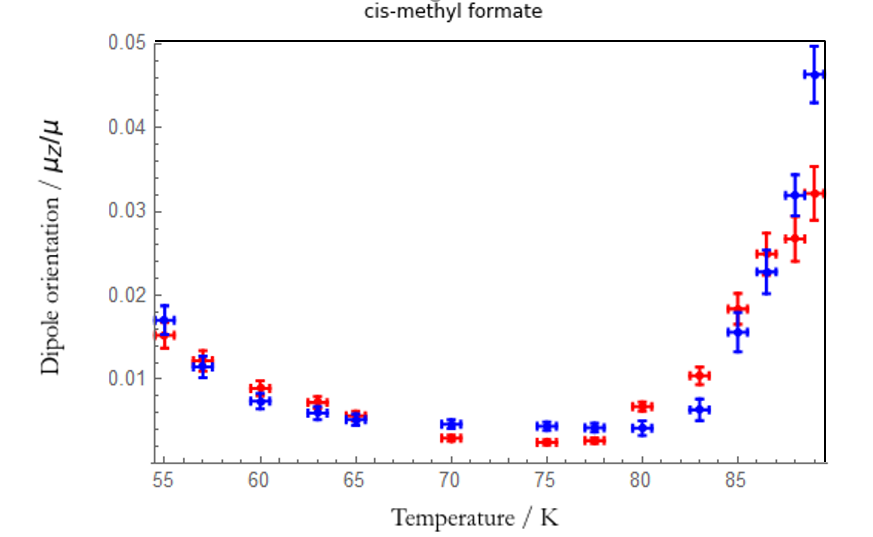

_Fig. S1: The variation of the degree of dipole orientation, $\langle\mu_z\rangle/\mu$, as a function of deposition temperature for *cis*-methyl formate, for a fixed value of $\zeta$ = 12200. Experimental data are shown as red points, derived from direct measurement of film surface potentials. Fits to experiment, blue points, are for $E_S$ and $E_A\,$=$\,$1.37$\,\pm\,$0.27$\,$x$\,$10<sup>7</sup>$\,$Vm<sup>-1</sup> and 1.27$\,\pm\,$0.19$\,$x$\,$10<sup>9</sup>Vm<sup>-1</sup> respectively._


### Supplementary References

  [1]<a class="anchor" id="ref_S1"> Topping, J., (1927). "On the mutual potential energy of a plane network of doublets" Proc. Roy. Soc. A. 1927, 114, 67–72.
  
  [2]<a class="anchor" id="ref_S2"> Field, D., Plekan, O., Cassidy, A., Balog, R., Jones, N.C.,Dunger, J., (2013). "Spontaneous electric fields in solid films: spontelectrics." Int. Rev. Phys. Chem., 32, 345–392
  
  [3]<a class="anchor" id="ref_S3"> Roman M., Taj S., Gutowski M., McCoustra M.R.S., Dunn A.C., Keolopile Z.G., Rosu-Finsen A., Cassidy A.M., Field D. (2019). "Non-linear and non-local behaviour in spontaneously electrical solids." Phys. Chem. Chem. Phys., 21, 1190-1197.
  
  [4]<a class="anchor" id="ref_S4"> Cassidy, A., James, R.L., Dawes, A., Field, D., (2020). "Crystallites and Electric Fields in Solid Ammonia" ChemistryOpen, 9, 983–990
  
  [5]<a class="anchor" id="ref_S5"> Olovsson, I., Templeton, D.H., (1959). "The crystal structure of Ammonia monohydrate." Acta Crystallogr. , 12, 827–832.
  
  [6]<a class="anchor" id="ref_S6"> A. W. Hewat, C. Riekel, (1979). "The crystal structure of deuteroammonia between 2 and 180 K by neutron powder profile refinement." Acta Crystallogr. Sect. A , 35, 569–571.
  
  [7]<a class="anchor" id="ref_S7"> Blair S.A., Thakkar A.J. (2014). "Relating polarizability to volume, ionization energy, electronegativity, hardness, moments of momentum, and other molecular properties." J.Chem.Phys, 141 074306-074311
  
  [8]<a class="anchor" id="ref_S8"> D’Aprano A., Donato I.D., (1990). "Dielectric polarization and polarizability of 1-pentanol+n-octane mixtures from static dielectric constant and refractive index data at 0,25 and 45°C." J. Solution Chemistry,  19, 883 
  
  [9]<a class="anchor" id="ref_S9"> CRC Handbook of Chemistry and Physics; Lide, D. R. Ed.; CRC Press: Boca Raton, 1997
  
  [10]<a class="anchor" id="ref_S10"> Kittel C., Introduction to Solid State Physics, 3rd Edn. New York, London, Sydney: John Wiley&Sons.
  
  [11]<a class="anchor" id="ref_S11"> Benitez, J. and F. Montáns (2018, November). “A simple and efficient numerical procedure to compute the inverse Langevin function with high accuracy.” J Non-Newton Fluid Mech. 261, 153–163.
  
  [12]<a class="anchor" id="ref_S12"> Jedynak, R. (2017). "New facts concerning the approximation of the inverse Langevin function". J Non-Newtonian Fluid Mechanics. 249: 8–25.
  
  [13]<a class="anchor" id="ref_S13"> Jedynak, R. (2018). "A comprehensive study of the mathematical methods used to approximate the inverse Langevin function". Mathematics and Mechanics of Solids. 24 (7): 1–25.
  
  [14]<a class="anchor" id="ref_S14"> Kröger, M. (2015, September). “Simple, admissible, and accurate approximants of the inverse Langevin and Brillouin functions, relevant for strong polymer deformations and flows.” J Non-Newton Fluid Mech. 223, 77–87.
  
  [15]<a class="anchor" id="ref_S15"> Petrosyan, R. (2017, November). “Improved approximations for some polymer extension models.” Rheologica Acta 56, 21–26.
  
  [16]<a class="anchor" id="ref_S16"> Cassidy AM, Mads R. V. MRV, Glavic A, Lauter V, Plekan O, Field D. (2021). "Low temperature aging in a molecular glass: the case of cis-methyl formate." Phys. Chem. Chem. Phys., 23, 15719-15726
    
  [17]<a class="anchor" id="ref_S17"> Lasser J. (2020) "Creating an executable paper is a journey through Open Science." Commun Phys 3, 143. https://doi.org/10.1038/s42005-020-00403-4.    

